<a href="https://colab.research.google.com/github/ShreyaSrivastava12/Projects/blob/main/NetworkAttackClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path="/content/drive/MyDrive/network_data.csv"
data=pd.read_csv(path)

In [46]:
data.shape

(99999, 40)

In [47]:
data.head()

L4_SRC_PORT  L4_DST_PORT  PROTOCOL  IN_BYTES  IN_PKTS  OUT_BYTES  OUT_PKTS  \
0        65389           80         6       420        3          0         0   
1        11154           80         6       280        2         40         1   
2        42062         1041         6        44        1         40         1   
3        46849         9110         6        44        1         40         1   
4        50360         1084         6        44        1         40         1   

   TCP_FLAGS  CLIENT_TCP_FLAGS  SERVER_TCP_FLAGS  ...  TCP_WIN_MAX_IN  \
0          2                 2                 0  ...             512   
1         22                 2                20  ...             512   
2         22                 2                20  ...            1024   
3         22                 2                20  ...            1024   
4         22                 2                20  ...            1024   

   TCP_WIN_MAX_OUT  ICMP_TYPE  ICMP_IPV4_TYPE  DNS_QUERY_ID  DNS_QUERY_TYPE  \
0                0      35840             140             0               0   
1                0          0               0             0               0   
2                0          0               0             0               0   
3                0          0               0             0               0   
4                0          0               0             0               0   

   DNS_TTL_ANSWER  FTP_COMMAND_RET_CODE  Label  Attack  
0               0                     0      1     DoS  
1               0                     0      1     DoS  
2               0                     0      0  Benign  
3               0                     0      0  Benign  
4               0                     0      0  Benign  

[5 rows x 40 columns]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   L4_SRC_PORT                  99999 non-null  int64 
 1   L4_DST_PORT                  99999 non-null  int64 
 2   PROTOCOL                     99999 non-null  int64 
 3   IN_BYTES                     99999 non-null  int64 
 4   IN_PKTS                      99999 non-null  int64 
 5   OUT_BYTES                    99999 non-null  int64 
 6   OUT_PKTS                     99999 non-null  int64 
 7   TCP_FLAGS                    99999 non-null  int64 
 8   CLIENT_TCP_FLAGS             99999 non-null  int64 
 9   SERVER_TCP_FLAGS             99999 non-null  int64 
 10  FLOW_DURATION_MILLISECONDS   99999 non-null  int64 
 11  DURATION_IN                  99999 non-null  int64 
 12  DURATION_OUT                 99999 non-null  int64 
 13  MIN_TTL                      99

In [49]:
data.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'IN_BYTES', 'IN_PKTS',
       'OUT_BYTES', 'OUT_PKTS', 'TCP_FLAGS', 'CLIENT_TCP_FLAGS',
       'SERVER_TCP_FLAGS', 'FLOW_DURATION_MILLISECONDS', 'DURATION_IN',
       'DURATION_OUT', 'MIN_TTL', 'MAX_TTL', 'LONGEST_FLOW_PKT',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'MAX_IP_PKT_LEN',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack'],
      dtype='object')

In [50]:
data.describe()

L4_SRC_PORT   L4_DST_PORT      PROTOCOL      IN_BYTES        IN_PKTS  \
count  99999.000000  99999.000000  99999.000000  9.999900e+04   99999.000000   
mean   40429.671497   3321.366614     10.240852  7.744449e+02       8.593586   
std    18423.844162  10646.096039      5.809118  2.965042e+04     478.870339   
min        0.000000      0.000000      1.000000  4.000000e+00       1.000000   
25%    27268.500000     80.000000      6.000000  5.600000e+01       1.000000   
50%    45778.000000     80.000000      6.000000  1.120000e+02       2.000000   
75%    55096.500000    443.000000     17.000000  2.800000e+02       3.000000   
max    65535.000000  65534.000000    253.000000  6.493320e+06  108222.000000   

          OUT_BYTES      OUT_PKTS     TCP_FLAGS  CLIENT_TCP_FLAGS  \
count  9.999900e+04  99999.000000  99999.000000      99999.000000   
mean   4.116128e+03      5.255223     24.176982         22.154812   
std    4.213230e+05    282.893644     58.356727         58.428056   
min    0.000000e+00      0.000000      0.000000          0.000000   
25%    0.000000e+00      0.000000      0.000000          0.000000   
50%    0.000000e+00      0.000000      2.000000          2.000000   
75%    1.530000e+02      1.000000     22.000000          6.000000   
max    1.235906e+08  82694.000000    223.000000        223.000000   

       SERVER_TCP_FLAGS  ...  NUM_PKTS_1024_TO_1514_BYTES  TCP_WIN_MAX_IN  \
count      99999.000000  ...                 99999.000000    99999.000000   
mean           9.526115  ...                     2.638436     6025.289953   
std           17.961738  ...                   280.367215    13183.390585   
min            0.000000  ...                     0.000000        0.000000   
25%            0.000000  ...                     0.000000        0.000000   
50%            0.000000  ...                     0.000000      512.000000   
75%           20.000000  ...                     0.000000     4096.000000   
max          222.000000  ...                 82289.000000    65535.000000   

       TCP_WIN_MAX_OUT     ICMP_TYPE  ICMP_IPV4_TYPE  DNS_QUERY_ID  \
count     99999.000000  99999.000000    99999.000000  99999.000000   
mean       8392.847898   3735.884279       14.593296   4479.180922   
std       17675.970146  11514.037495       44.976708  13301.365010   
min           0.000000      0.000000        0.000000      0.000000   
25%           0.000000      0.000000        0.000000      0.000000   
50%           0.000000      0.000000        0.000000      0.000000   
75%           0.000000      0.000000        0.000000      0.000000   
max       65535.000000  65280.000000      255.000000  65529.000000   

       DNS_QUERY_TYPE  DNS_TTL_ANSWER  FTP_COMMAND_RET_CODE         Label  
count    99999.000000    9.999900e+04          99999.000000  99999.000000  
mean         1.343393    4.388277e+04              1.443544      0.670147  
std          9.657515    1.358180e+07             19.372036      0.470162  
min          0.000000    0.000000e+00              0.000000      0.000000  
25%          0.000000    0.000000e+00              0.000000      0.000000  
50%          0.000000    0.000000e+00              0.000000      1.000000  
75%          0.000000    0.000000e+00              0.000000      1.000000  
max        255.000000    4.294916e+09            530.000000      1.000000  

[8 rows x 39 columns]

In [51]:
data.value_counts('Attack')

Attack
Benign            32985
DDoS              28742
DoS               23542
scanning           4955
Reconnaissance     3444
xss                3217
password           1519
injection           930
Bot                 197
Brute Force         190
Infilteration       161
Exploits             34
Fuzzers              25
Backdoor             23
Generic              19
mitm                  8
ransomware            3
Shellcode             2
Analysis              2
Theft                 1
dtype: int64

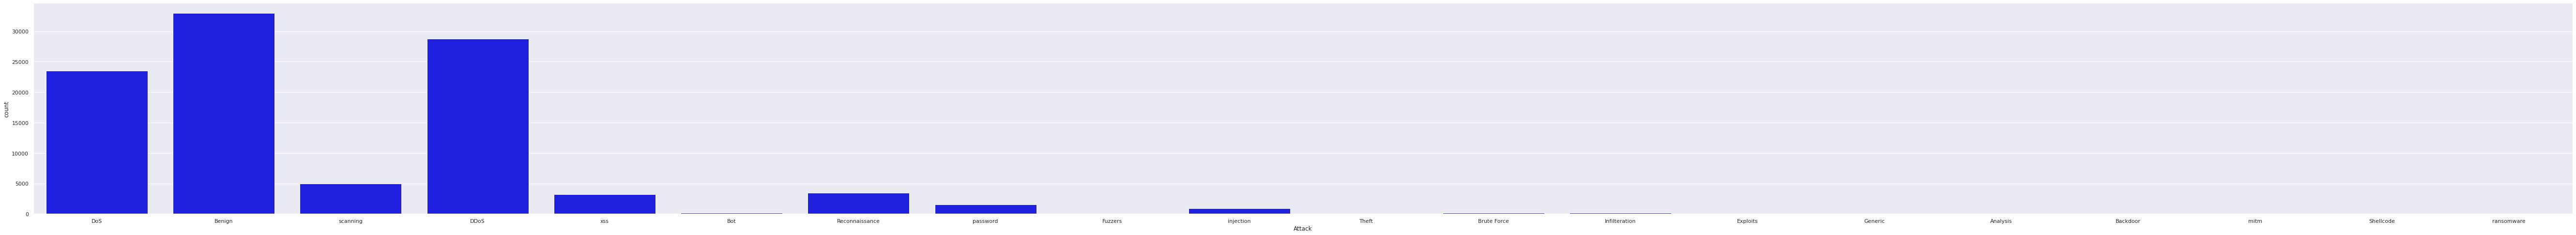

In [84]:
sns.countplot(x=data['Attack'],color="blue",data=data)
sns.set(rc = {'figure.figsize':(29,8)})
plt.show()

In [53]:
data.isnull().sum()/len(data) * 100  # missing value ratio

L4_SRC_PORT                    0.0
L4_DST_PORT                    0.0
PROTOCOL                       0.0
IN_BYTES                       0.0
IN_PKTS                        0.0
OUT_BYTES                      0.0
OUT_PKTS                       0.0
TCP_FLAGS                      0.0
CLIENT_TCP_FLAGS               0.0
SERVER_TCP_FLAGS               0.0
FLOW_DURATION_MILLISECONDS     0.0
DURATION_IN                    0.0
DURATION_OUT                   0.0
MIN_TTL                        0.0
MAX_TTL                        0.0
LONGEST_FLOW_PKT               0.0
SHORTEST_FLOW_PKT              0.0
MIN_IP_PKT_LEN                 0.0
MAX_IP_PKT_LEN                 0.0
RETRANSMITTED_IN_BYTES         0.0
RETRANSMITTED_IN_PKTS          0.0
RETRANSMITTED_OUT_BYTES        0.0
RETRANSMITTED_OUT_PKTS         0.0
SRC_TO_DST_AVG_THROUGHPUT      0.0
DST_TO_SRC_AVG_THROUGHPUT      0.0
NUM_PKTS_UP_TO_128_BYTES       0.0
NUM_PKTS_128_TO_256_BYTES      0.0
NUM_PKTS_256_TO_512_BYTES      0.0
NUM_PKTS_512_TO_1024

In [54]:
x=data.drop(['Attack'],axis=1)
y=data['Attack']
x.var() # low varience filter

L4_SRC_PORT                    3.394380e+08
L4_DST_PORT                    1.133394e+08
PROTOCOL                       3.374586e+01
IN_BYTES                       8.791475e+08
IN_PKTS                        2.293168e+05
OUT_BYTES                      1.775131e+11
OUT_PKTS                       8.002881e+04
TCP_FLAGS                      3.405508e+03
CLIENT_TCP_FLAGS               3.413838e+03
SERVER_TCP_FLAGS               3.226240e+02
FLOW_DURATION_MILLISECONDS     4.576252e+12
DURATION_IN                    7.571271e+05
DURATION_OUT                   2.777959e+04
MIN_TTL                        1.546227e+03
MAX_TTL                        1.548460e+03
LONGEST_FLOW_PKT               1.807579e+05
SHORTEST_FLOW_PKT              2.048859e+03
MIN_IP_PKT_LEN                 7.296577e+02
MAX_IP_PKT_LEN                 1.807579e+05
RETRANSMITTED_IN_BYTES         5.694721e+06
RETRANSMITTED_IN_PKTS          7.403180e+00
RETRANSMITTED_OUT_BYTES        2.782024e+08
RETRANSMITTED_OUT_PKTS         1

In [55]:
x.drop(['Label'],inplace=True,axis=1)

In [56]:
x.shape

(99999, 38)

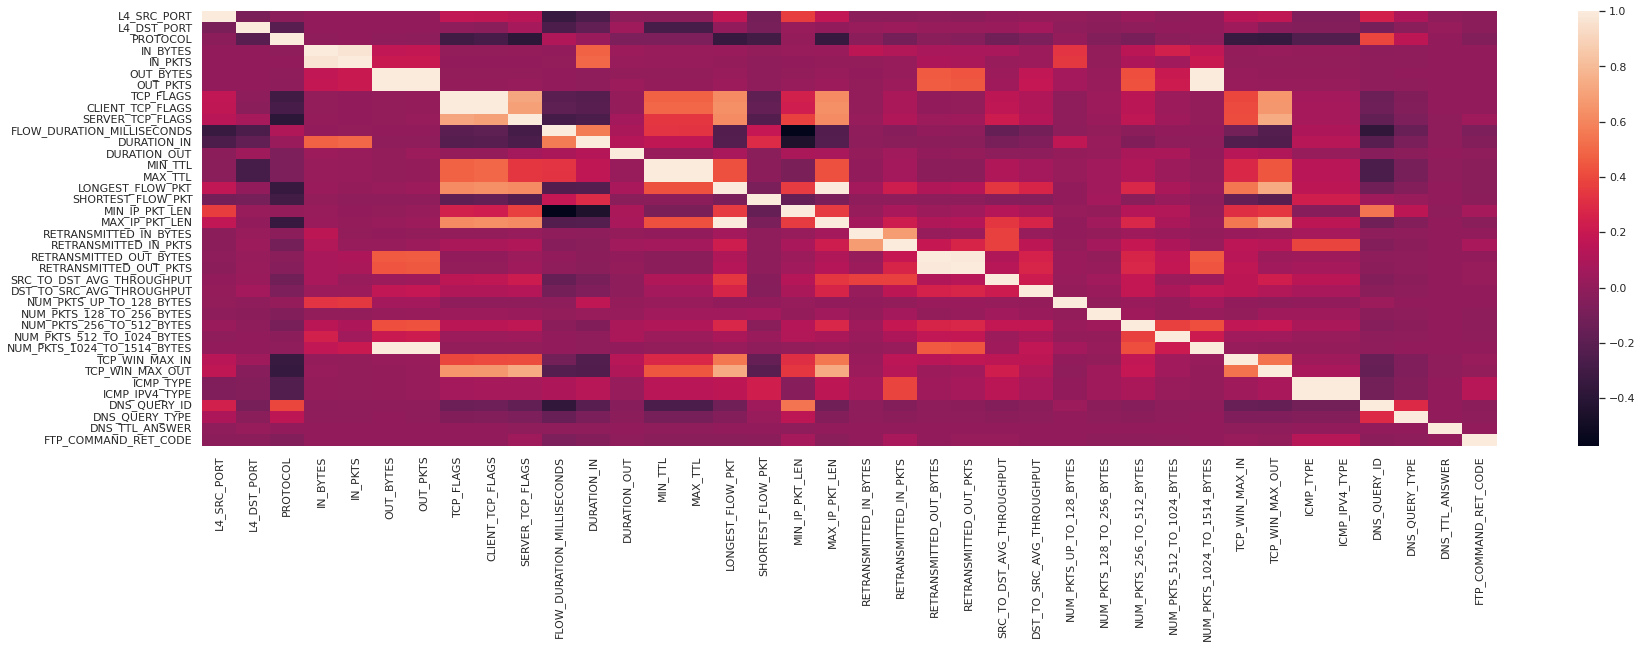

In [57]:
sns.heatmap(x.corr())

In [58]:
numeric = x # high correlation filter
correlation = numeric.corr()
numeric_columns = numeric.columns
high_corr = [ ]
for c1 in numeric_columns:
  for c2 in numeric_columns:
    if c1 != c2 and c2 not in high_corr and correlation[c1][c2] > 0.6:
      high_corr.append(c1)

In [59]:
high_corr

['IN_BYTES',
 'OUT_BYTES',
 'OUT_BYTES',
 'OUT_PKTS',
 'TCP_FLAGS',
 'TCP_FLAGS',
 'TCP_FLAGS',
 'TCP_FLAGS',
 'TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'CLIENT_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'SERVER_TCP_FLAGS',
 'MIN_TTL',
 'LONGEST_FLOW_PKT',
 'LONGEST_FLOW_PKT',
 'MAX_IP_PKT_LEN',
 'RETRANSMITTED_IN_BYTES',
 'RETRANSMITTED_OUT_BYTES',
 'ICMP_TYPE']

In [60]:
x.drop(['IN_BYTES','OUT_BYTES','OUT_PKTS','TCP_FLAGS','CLIENT_TCP_FLAGS','SERVER_TCP_FLAGS','MIN_TTL','LONGEST_FLOW_PKT','MAX_IP_PKT_LEN','RETRANSMITTED_IN_BYTES','RETRANSMITTED_OUT_BYTES','ICMP_TYPE'],inplace=True,axis=1)

In [61]:
x.shape

(99999, 26)

In [62]:
x.columns

Index(['L4_SRC_PORT', 'L4_DST_PORT', 'PROTOCOL', 'IN_PKTS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MAX_TTL',
       'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_PKTS', 'SRC_TO_DST_AVG_THROUGHPUT',
       'DST_TO_SRC_AVG_THROUGHPUT', 'NUM_PKTS_UP_TO_128_BYTES',
       'NUM_PKTS_128_TO_256_BYTES', 'NUM_PKTS_256_TO_512_BYTES',
       'NUM_PKTS_512_TO_1024_BYTES', 'NUM_PKTS_1024_TO_1514_BYTES',
       'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID',
       'DNS_QUERY_TYPE', 'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE'],
      dtype='object')

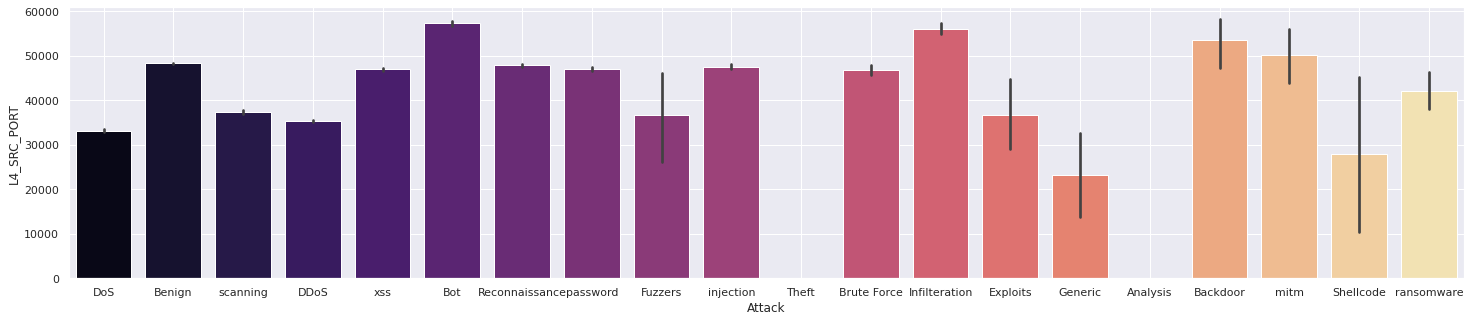

In [63]:
# barplot between Attacks and L4_SRC_PORT
plt.figure(figsize=(25,5))
sns.barplot(x='Attack',y='L4_SRC_PORT',data=data,palette='magma')
plt.grid(True)
plt.show()

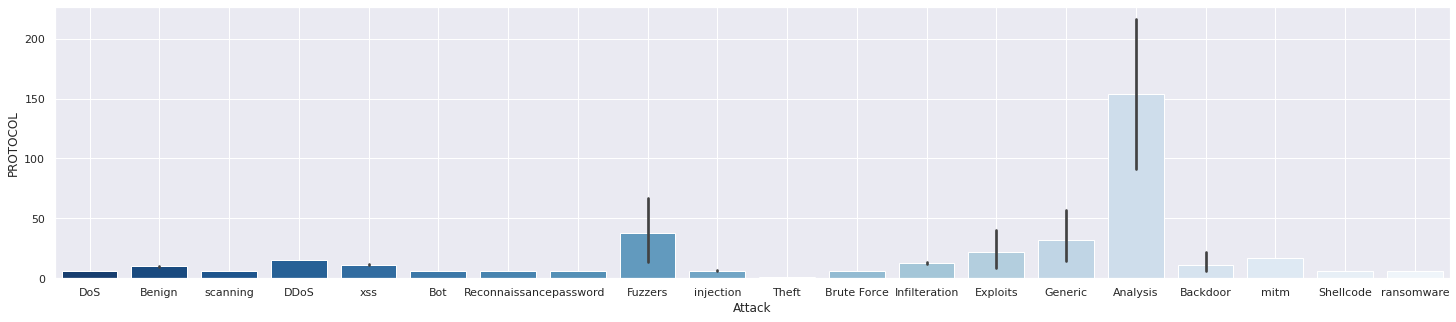

In [64]:
# barplot between Attacks and PROTOCOL
plt.figure(figsize=(25,5))
sns.barplot(x='Attack',y='PROTOCOL',data=data,palette='Blues_r')
plt.grid(True)
plt.show()

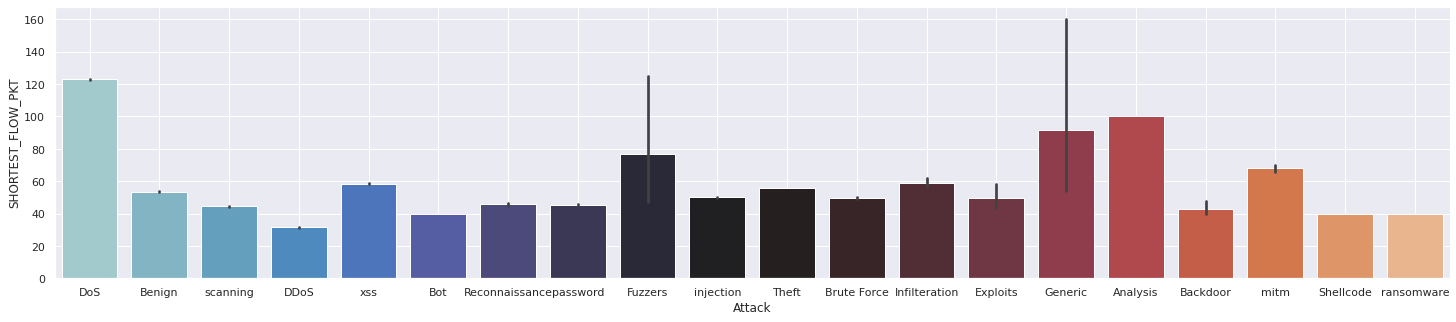

In [65]:
# barplot between Attacks and SHORTEST_FLOW_PKT
plt.figure(figsize=(25,5))
sns.barplot(x='Attack',y='SHORTEST_FLOW_PKT',data=data,palette='icefire')
plt.grid(True)
plt.show()

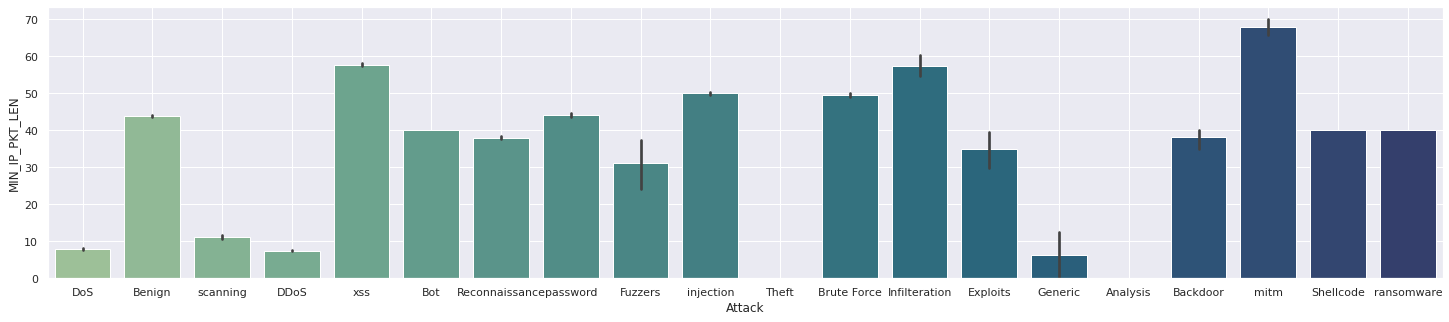

In [66]:
# barplot between Attacks and MIN_IP_PKT_LEN
plt.figure(figsize=(25,5))
sns.barplot(x='Attack',y='MIN_IP_PKT_LEN',data=data,palette='crest')
plt.grid(True)
plt.show()

In [67]:
print("X_shape--->",x.shape)
print("y_shape-->",y.shape)

X_shape---> (99999, 26)
y_shape--> (99999,)


In [68]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=1)
print("X_train_shape--->",x_train.shape)
print("X_test_shape--->",x_test.shape)
print("y_train_shape--->",y_train.shape)
print("y_test_shape--->",y_test.shape)

X_train_shape---> (79999, 26)
X_test_shape---> (20000, 26)
y_train_shape---> (79999,)
y_test_shape---> (20000,)


In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [70]:
y_pred = rfc.predict(x_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 97.37 %


In [71]:
dataframe=pd.DataFrame({'Actual':y_test,'predict':y_pred})
print(dataframe)

               Actual         predict
43659          Benign          Benign
87277             xss             xss
14317             DoS             DoS
93426  Reconnaissance  Reconnaissance
95320             DoS             DoS
...               ...             ...
73440            DDoS            DDoS
1341        injection       injection
59908          Benign          Benign
26910            DDoS            DDoS
24890          Benign          Benign

[20000 rows x 2 columns]


In [72]:
imp_df = pd.DataFrame({"Feature Name": x_train.columns,"Importance": rfc.feature_importances_})
imp_df.sort_values(by="Importance", ascending=False)

Feature Name  Importance
12    SRC_TO_DST_AVG_THROUGHPUT    0.135673
8             SHORTEST_FLOW_PKT    0.125413
14     NUM_PKTS_UP_TO_128_BYTES    0.097736
4    FLOW_DURATION_MILLISECONDS    0.085660
19               TCP_WIN_MAX_IN    0.077657
5                   DURATION_IN    0.072113
1                   L4_DST_PORT    0.071112
13    DST_TO_SRC_AVG_THROUGHPUT    0.057874
15    NUM_PKTS_128_TO_256_BYTES    0.042243
0                   L4_SRC_PORT    0.040147
9                MIN_IP_PKT_LEN    0.033024
7                       MAX_TTL    0.032848
20              TCP_WIN_MAX_OUT    0.028272
3                       IN_PKTS    0.023973
2                      PROTOCOL    0.023380
24               DNS_TTL_ANSWER    0.012356
22                 DNS_QUERY_ID    0.007189
23               DNS_QUERY_TYPE    0.006204
6                  DURATION_OUT    0.006199
16    NUM_PKTS_256_TO_512_BYTES    0.006073
17   NUM_PKTS_512_TO_1024_BYTES    0.004101
18  NUM_PKTS_1024_TO_1514_BYTES    0.003842
21               ICMP_IPV4_TYPE    0.002622
10        RETRANSMITTED_IN_PKTS    0.002355
11       RETRANSMITTED_OUT_PKTS    0.001630
25         FTP_COMMAND_RET_CODE    0.000303

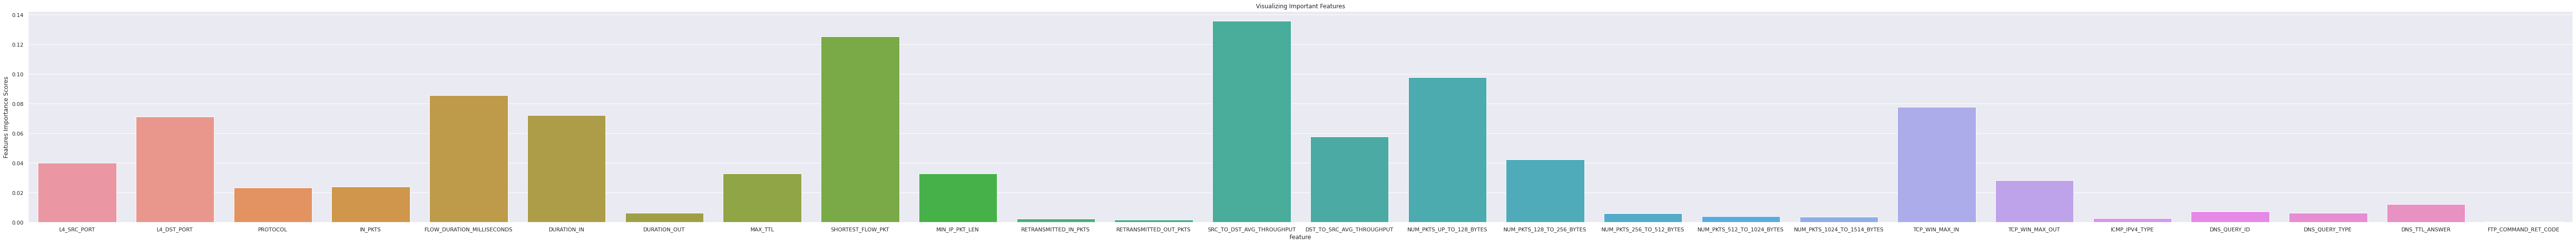

In [86]:
sns.barplot(x=x_train.columns, y=rfc.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Features Importance Scores')
plt.title("Visualizing Important Features")
sns.set(font_scale=1,rc = {'figure.figsize':(94,8)})
plt.show()

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [75]:
y_pred = dtree.predict(x_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 96.48 %


In [76]:
dataframe=pd.DataFrame({'Actual':y_test,'predict':y_pred})
print(dataframe)

               Actual         predict
43659          Benign          Benign
87277             xss             xss
14317             DoS             DoS
93426  Reconnaissance  Reconnaissance
95320             DoS             DoS
...               ...             ...
73440            DDoS            DDoS
1341        injection       injection
59908          Benign          Benign
26910            DDoS            DDoS
24890          Benign          Benign

[20000 rows x 2 columns]


In [77]:
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [79]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.134668 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.134668 to fit



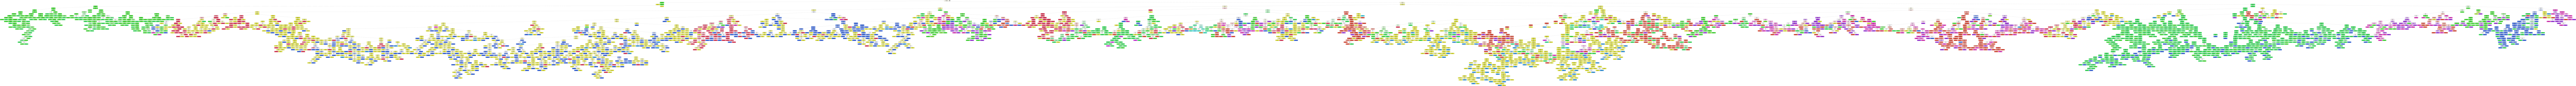

In [80]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,filled=True,feature_names = x.columns,class_names=['0','1','2','3','4','5','6','7','8','9','10','12','13','14','15','16','17','18','19','20','21','22','23','24','25'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('network.png')
Image(graph.create_png())

In [81]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=1)
classifier.fit(x_train,y_train)

SVC(random_state=1)

In [82]:
y_pred = classifier.predict(x_test)
print("Accuracy: ",accuracy_score(y_test, y_pred)*100)

Accuracy:  77.375


In [83]:
dataframe=pd.DataFrame({'Actual':y_test,'predict':y_pred})
print(dataframe)

               Actual predict
43659          Benign  Benign
87277             xss    DDoS
14317             DoS     DoS
93426  Reconnaissance  Benign
95320             DoS     DoS
...               ...     ...
73440            DDoS    DDoS
1341        injection  Benign
59908          Benign  Benign
26910            DDoS    DDoS
24890          Benign  Benign

[20000 rows x 2 columns]
